In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [5]:
ls /content/gdrive/'My Drive'/'Colab Notebooks'/review_data/

extreme_job_review2.txt  test_data_12.csv  test_data_14.csv
test_data_11.csv         test_data_13.csv


In [6]:
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [7]:
reviews = []
with open('/content/gdrive/My Drive/Colab Notebooks/review_data/test_data_11.csv', 'r') as review_file:
  reviews.extend([line.split(',')[-1] for line in review_file.readlines()])
with open('/content/gdrive/My Drive/Colab Notebooks/review_data/test_data_12.csv', 'r') as review_file:
  reviews.extend([line.split(',')[-1] for line in review_file.readlines()])
with open('/content/gdrive/My Drive/Colab Notebooks/review_data/test_data_13.csv', 'r') as review_file:
  reviews.extend([line.split(',')[-1] for line in review_file.readlines()])
with open('/content/gdrive/My Drive/Colab Notebooks/review_data/test_data_14.csv', 'r') as review_file:
  reviews.extend([line.split(',')[-1] for line in review_file.readlines()])
print(reviews[-1])
print(len(reviews))

Love how deeply this moisturizes  along with the Water Pack! My skin is baby soft in the morning.

679


In [8]:
texts = nltk.word_tokenize(reviews[-1])
print(nltk.pos_tag(texts))

[('Love', 'VB'), ('how', 'WRB'), ('deeply', 'RB'), ('this', 'DT'), ('moisturizes', 'VBZ'), ('along', 'IN'), ('with', 'IN'), ('the', 'DT'), ('Water', 'NNP'), ('Pack', 'NN'), ('!', '.'), ('My', 'PRP$'), ('skin', 'NN'), ('is', 'VBZ'), ('baby', 'JJ'), ('soft', 'JJ'), ('in', 'IN'), ('the', 'DT'), ('morning', 'NN'), ('.', '.')]


In [0]:
nn = []
for review in reviews:
  texts = nltk.word_tokenize(review)
  pos = nltk.pos_tag(texts)
  nn.extend([p[0] for p in pos if p[1]=='NN'])

In [10]:
print(nn[:10])
print(len(nn))

['textcontent', 'skin', 'care', 'regime', 'life', 'cleansing', 'look', 'cleanser', 'item', 'skin']
4493


In [11]:
from collections import Counter,OrderedDict
# Colab에서 matplotlib 한글 깨짐 현상 해결
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'

!apt autoremove
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

Reading package lists... Done
Building dependency tree       
Reading state information... Done
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.


In [12]:
count_list=Counter(nn)
print(len(count_list))

887


In [0]:
# counter안의 value를 sort해줌
sorted_list=count_list.most_common()
# 다시 dictionary 형태로 변환
sorted_list=OrderedDict(sorted_list)

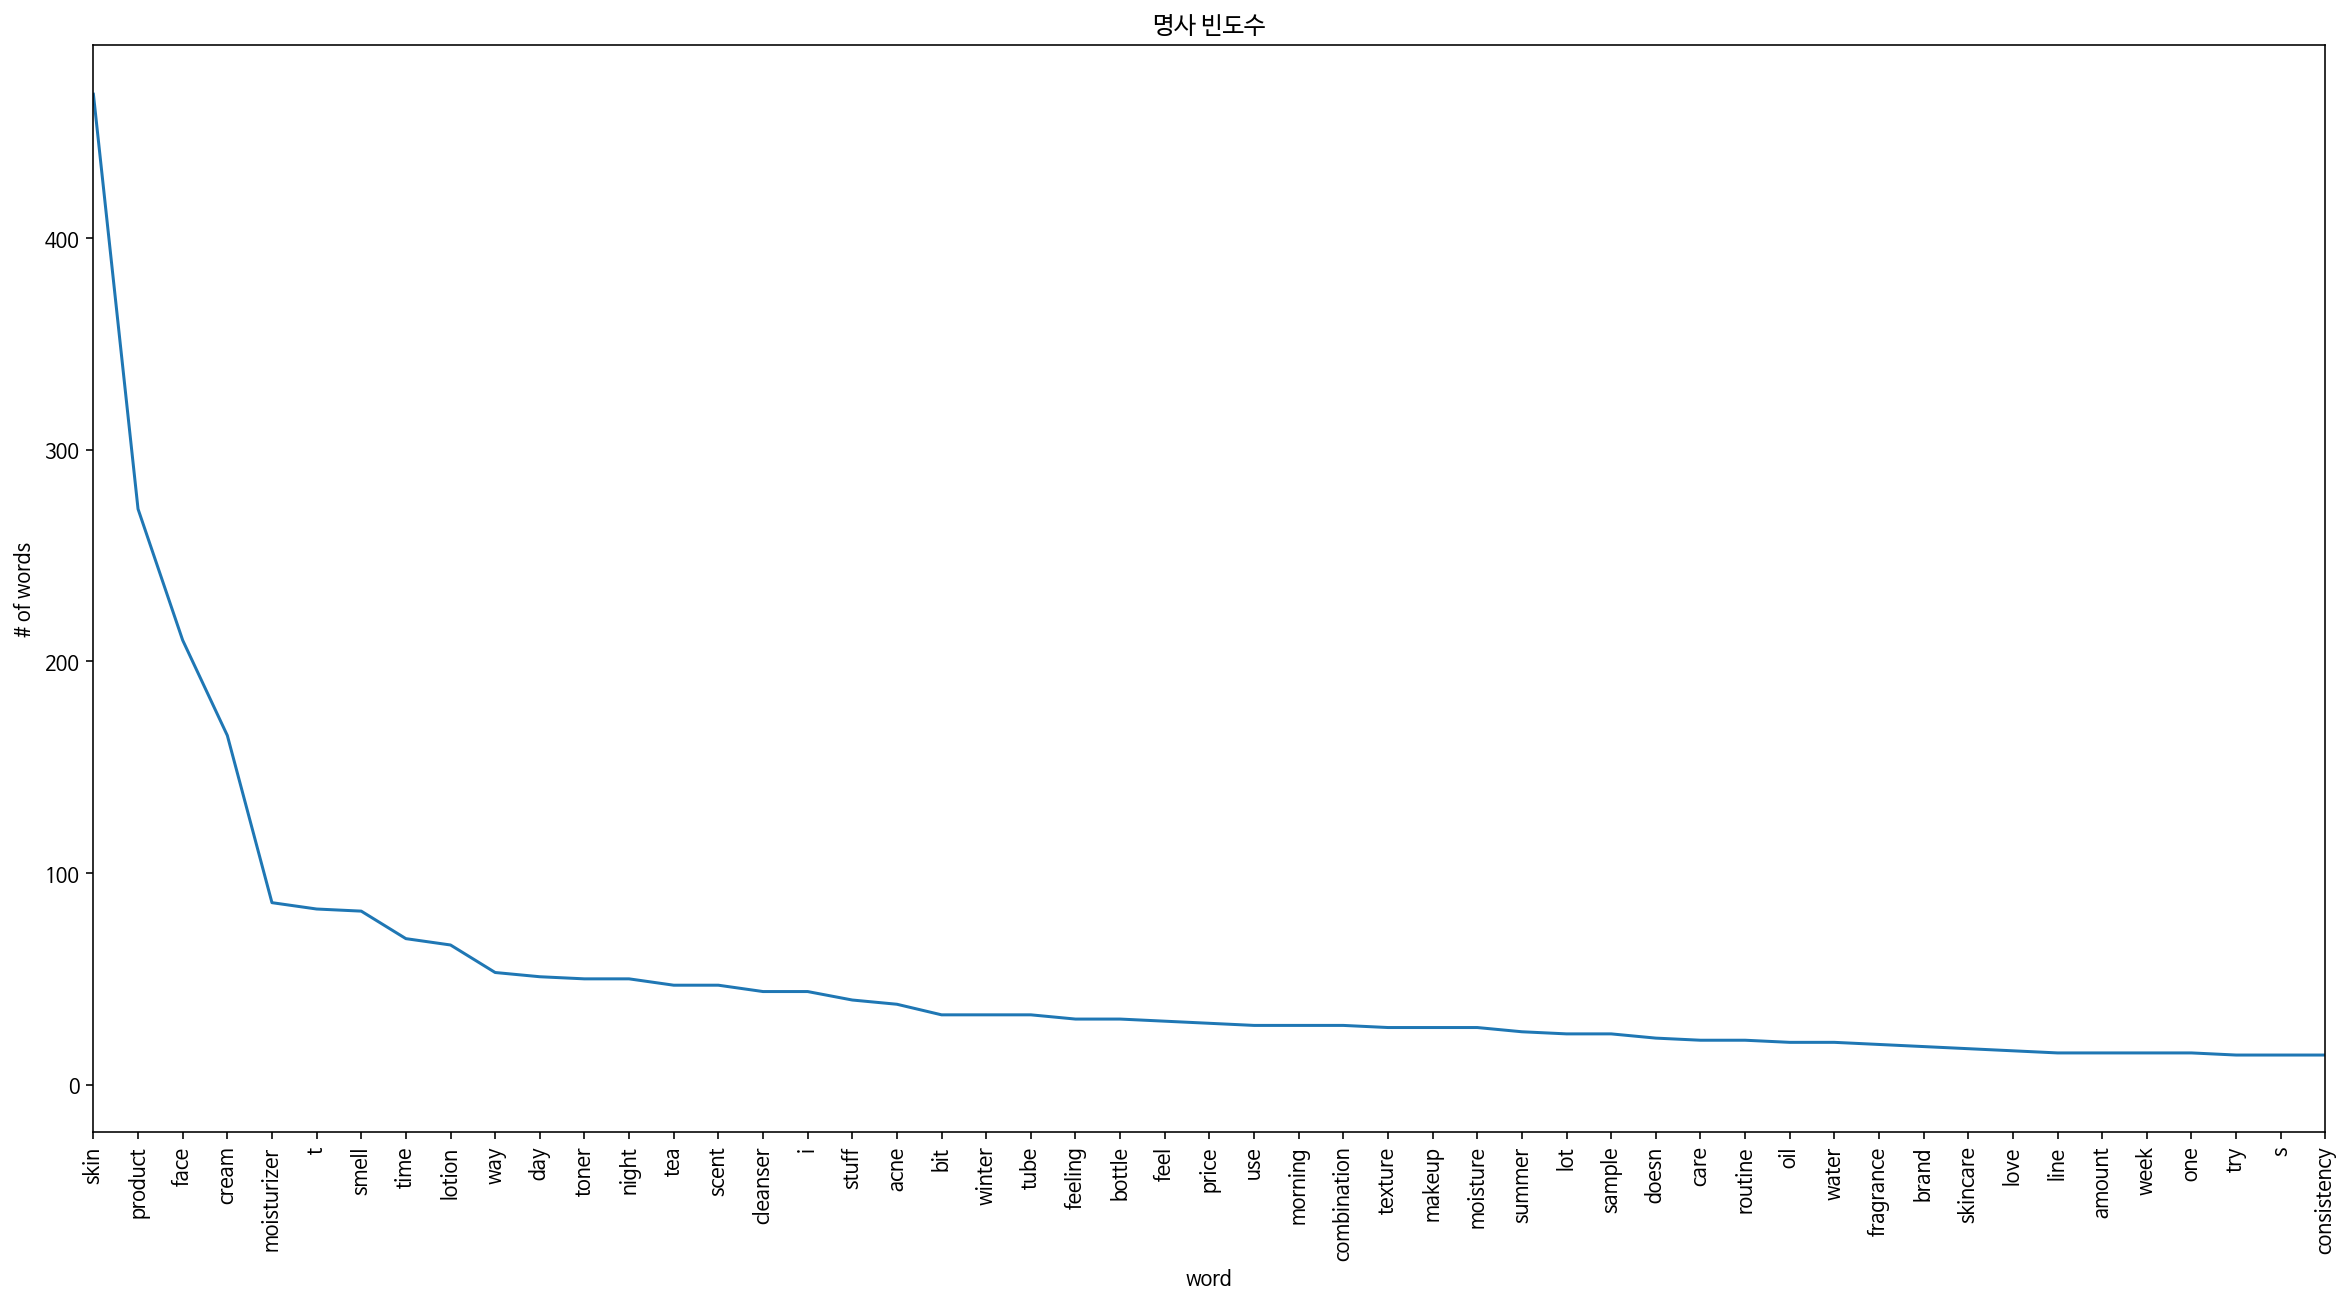

In [14]:
# 폰트 깨지면서 warning 발생시 '런타임>런타임 다시 시작' 후 처음부터 다시 실행
plt.figure(figsize=(20, 10))
plt.xticks(rotation=90)
plt.plot(list(sorted_list.keys()), list(sorted_list.values()))
plt.xlim(0,50)
plt.title("명사 빈도수")
plt.ylabel("# of words")
plt.xlabel("word")
plt.show()